<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting up</a></span></li></ul></li><li><span><a href="#How-time-is-spent" data-toc-modified-id="How-time-is-spent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How time is spent</a></span><ul class="toc-item"><li><span><a href="#Australia" data-toc-modified-id="Australia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Australia</a></span></li><li><span><a href="#Germany" data-toc-modified-id="Germany-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Germany</a></span></li><li><span><a href="#Netherlands" data-toc-modified-id="Netherlands-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Netherlands</a></span></li><li><span><a href="#New-Zealand" data-toc-modified-id="New-Zealand-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>New Zealand</a></span></li><li><span><a href="#South-Africa" data-toc-modified-id="South-Africa-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>South Africa</a></span></li><li><span><a href="#United-Kingdom" data-toc-modified-id="United-Kingdom-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>United Kingdom</a></span></li><li><span><a href="#United-States" data-toc-modified-id="United-States-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>United States</a></span></li><li><span><a href="#Rest-of-the-World" data-toc-modified-id="Rest-of-the-World-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Rest of the World</a></span></li></ul></li></ul></div>

# Introduction

## Setting up

In [1]:
%%capture  
# Import notebook containing the imports the functions and the dataset
%run "./0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "./1. Overview and sampling.ipynb"

# How time is spent

RSE/RSE are supposed to be an hybrid role, compared to pure software developer. They bring a knowledge from their field but also are developing software. To capture this different tasks they may do during their work, we asked them how they spend their time. We specifically asked for the following questions:
* On average, how much of your time is spent developing software
* On average, how much of your time is spent on research
* On average, how much of your time is spent on management
* On average, how much of your time is spent on teaching
* On average, how much of your time is spent on other activities

They answered with a likert scale from *1 (None at all)* to *10 (All my time)*.

The same questions asked them how much time they wanted to spend on these activities. With that it was possible to see if discrepancies exist between what they actual do and what they want to do. 

To calculate the difference between what they want and what they do, we only substract the answer they gave us to **wish to spent** the  with the answer they gave us to the **time spent**. It is therefore possible to understand the results as:
1. The result is zero: it is a total adequation between what they do and what they want. 
1. The result is negative: They wish to spend less time to do that activity
1. The result is positive: They wish to spend more time to do that activity



In [2]:
# Create the two df containing time spent and time they wish they could spend.

# Information about time spent
df_time_spent = df[df['Year'] == 2018][['Country',
                                        'time1can. On average, how much of your time is spent developing software?',
                                        'time2can. On average, how much of your time is spent on research',
                                        'time3can. On average, how much of your time is spent on management',
                                        'time4can. On average, how much of your time is spent on teaching',
                                        'time5can. On average, how much of your time is spent on other activities']].copy()
# Information about the time they wish to spend
df_time_wish = df[df['Year'] == 2018][['Country',
                                       'timeLike6zaf. In an average month, how much time would you like to spend on software development?',
                                       'timeLike7zaf. In an average month, how much time would you like to spend on research',
                                       'timeLike8zaf. In an average month, how much time would you like to spend on management',
                                       'timeLike9zaf. In an average month, how much time would you like to spend on teaching',
                                       'timeLike10zaf. In an average month, how much time would you like to spend on other activities']].copy()

# Replace the value 1 (None at all) and 10 (all my time) into int
df_time_spent.replace({'\ufeff1 (None at all)': 1, '10 (All my time)': 10}, inplace=True)
df_time_wish.replace({'\ufeff1 (None at all)': 1, '10 (All my time)': 10}, inplace=True)

# Create a new dataframe with the difference between what they do and what they wish
# Create a dataframe to show the difference
dict_time_diff = collections.OrderedDict()
dict_time_diff['Country'] = df_time_spent['Country']
dict_time_diff['Software Development difference'] = df_time_wish['timeLike6zaf. In an average month, how much time would you like to spend on software development?'].astype(float) - df_time_spent['time1can. On average, how much of your time is spent developing software?'].astype(float)  
dict_time_diff['Research difference'] = df_time_wish['timeLike7zaf. In an average month, how much time would you like to spend on research'].astype(float) - df_time_spent['time2can. On average, how much of your time is spent on research'].astype(float)
dict_time_diff['Management difference'] = df_time_wish['timeLike8zaf. In an average month, how much time would you like to spend on management'].astype(float) -  df_time_spent['time3can. On average, how much of your time is spent on management'].astype(float)
dict_time_diff['Teaching difference'] = df_time_wish['timeLike9zaf. In an average month, how much time would you like to spend on teaching'].astype(float) - df_time_spent['time4can. On average, how much of your time is spent on teaching'].astype(float)
dict_time_diff['Other activity difference'] = df_time_wish['timeLike10zaf. In an average month, how much time would you like to spend on other activities'].astype(float) - df_time_spent['time5can. On average, how much of your time is spent on other activities'].astype(float)
df_time_diff = pd.DataFrame.from_dict(dict_time_diff)

renaming_col = ['Country', 'Developing software', 'Research', 'Management', 'Teaching', 'Other activities']
df_time_spent.columns = renaming_col
df_time_wish.columns = renaming_col
df_time_diff.columns = renaming_col

## Australia

In [3]:
country = 'Australia'

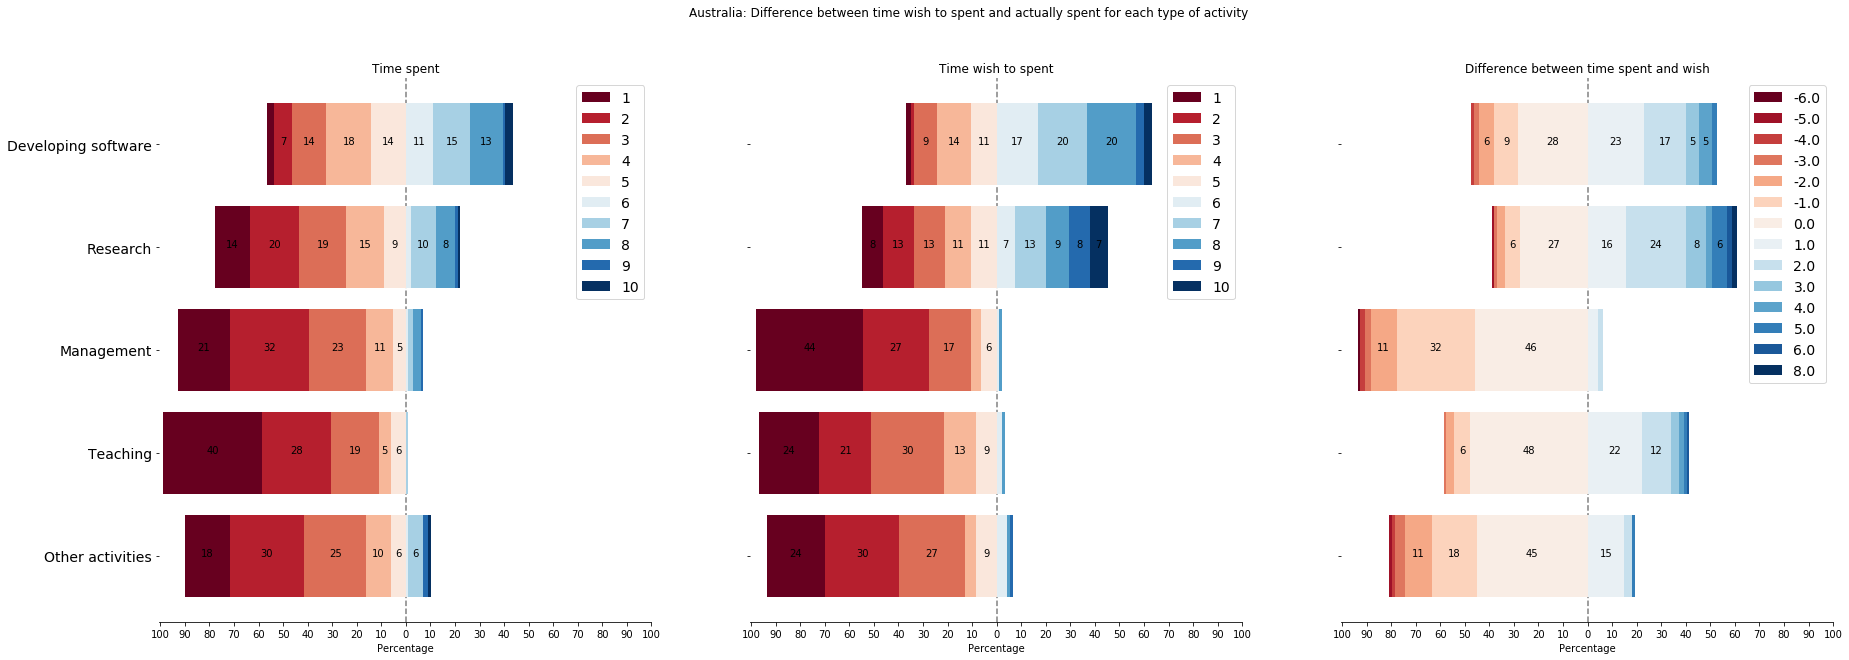

In [4]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## Germany

In [5]:
country = 'Germany'

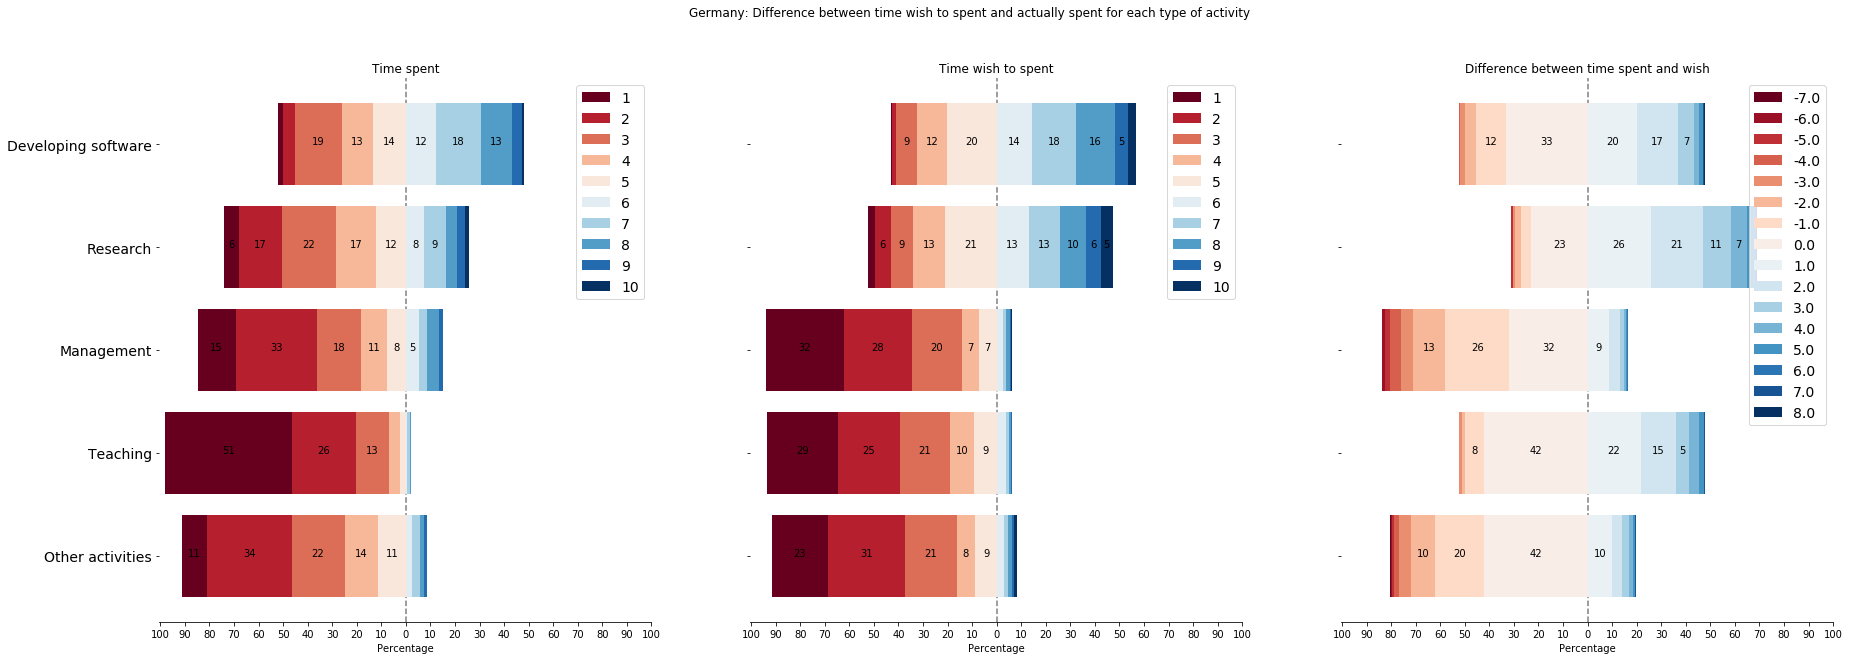

In [6]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## Netherlands

In [7]:
country = 'Netherlands'

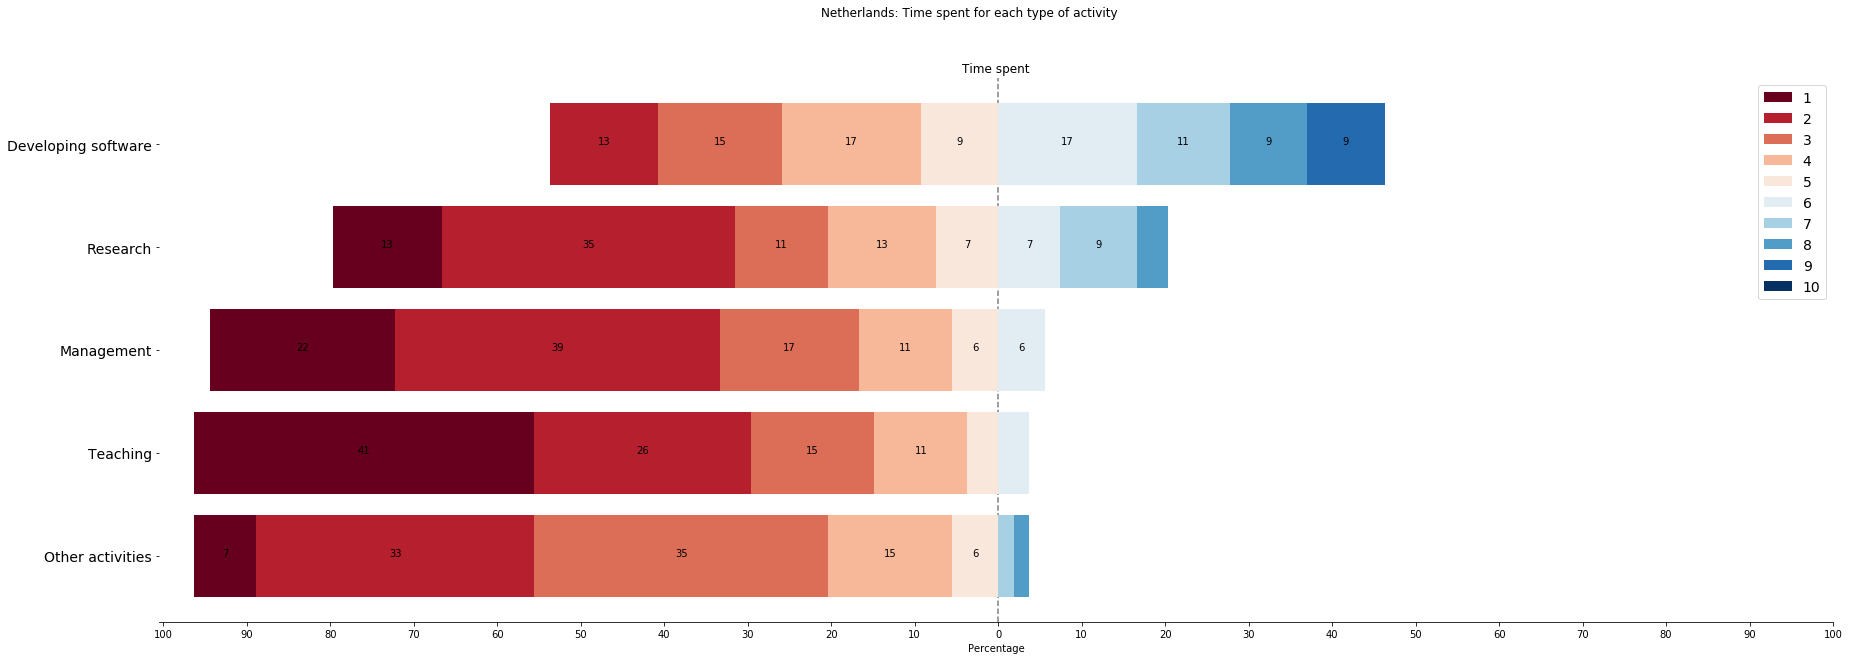

In [8]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent)

## New Zealand

In [9]:
country = 'New Zealand'

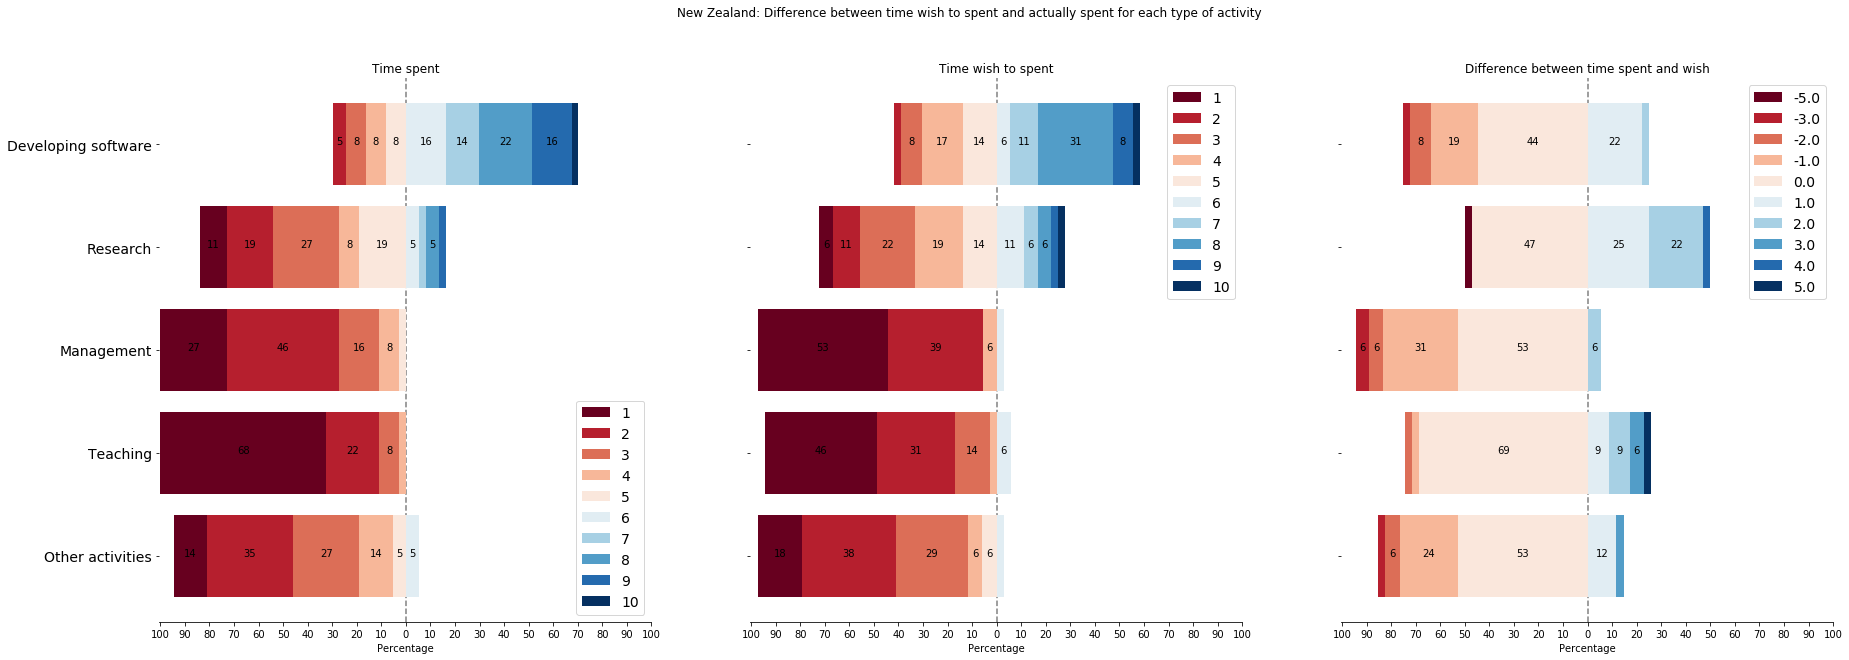

In [10]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## South Africa

In [11]:
country = 'South Africa'

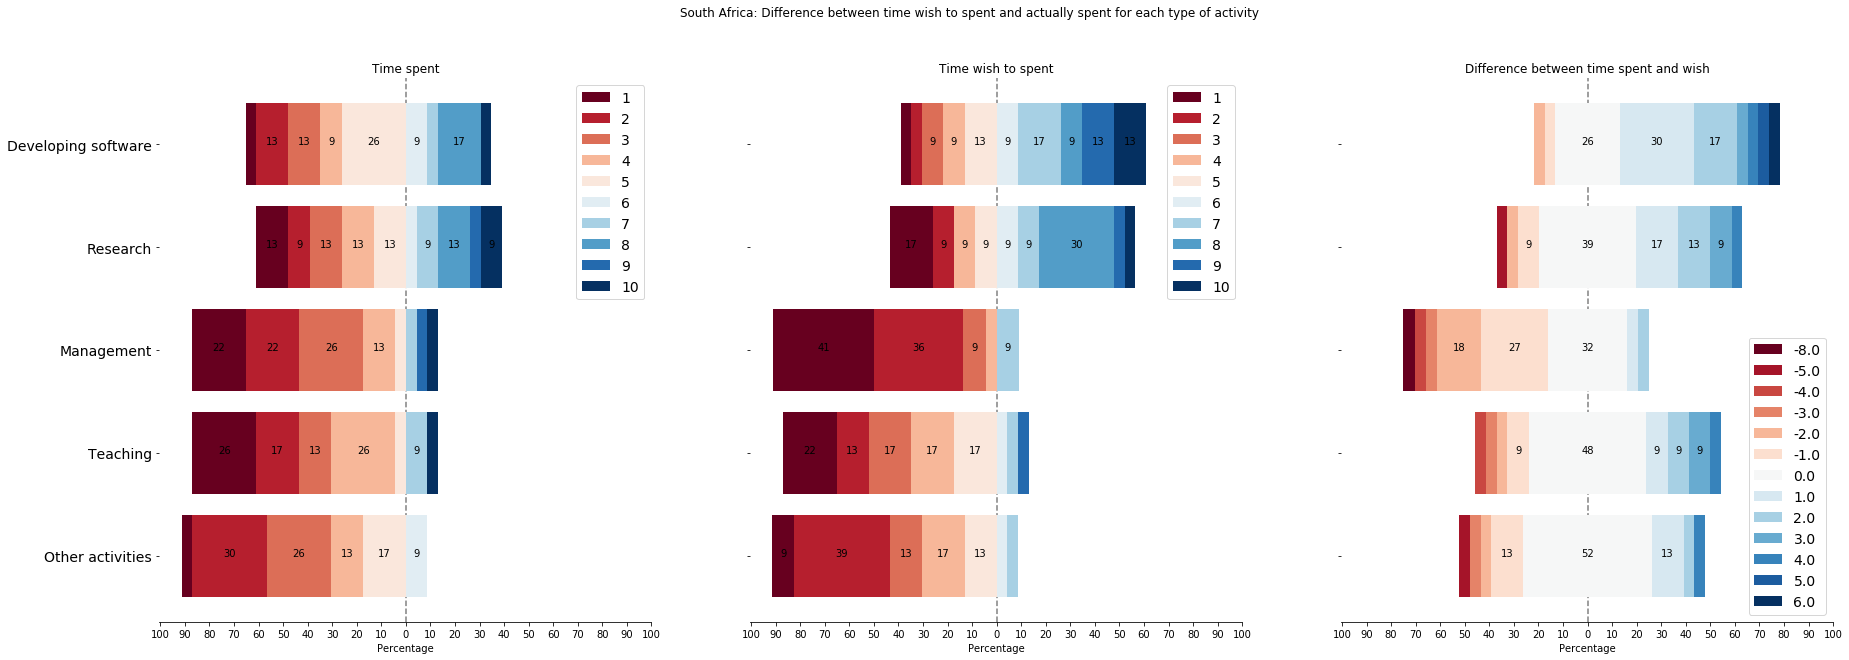

In [12]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## United Kingdom

In [13]:
country = 'United Kingdom'

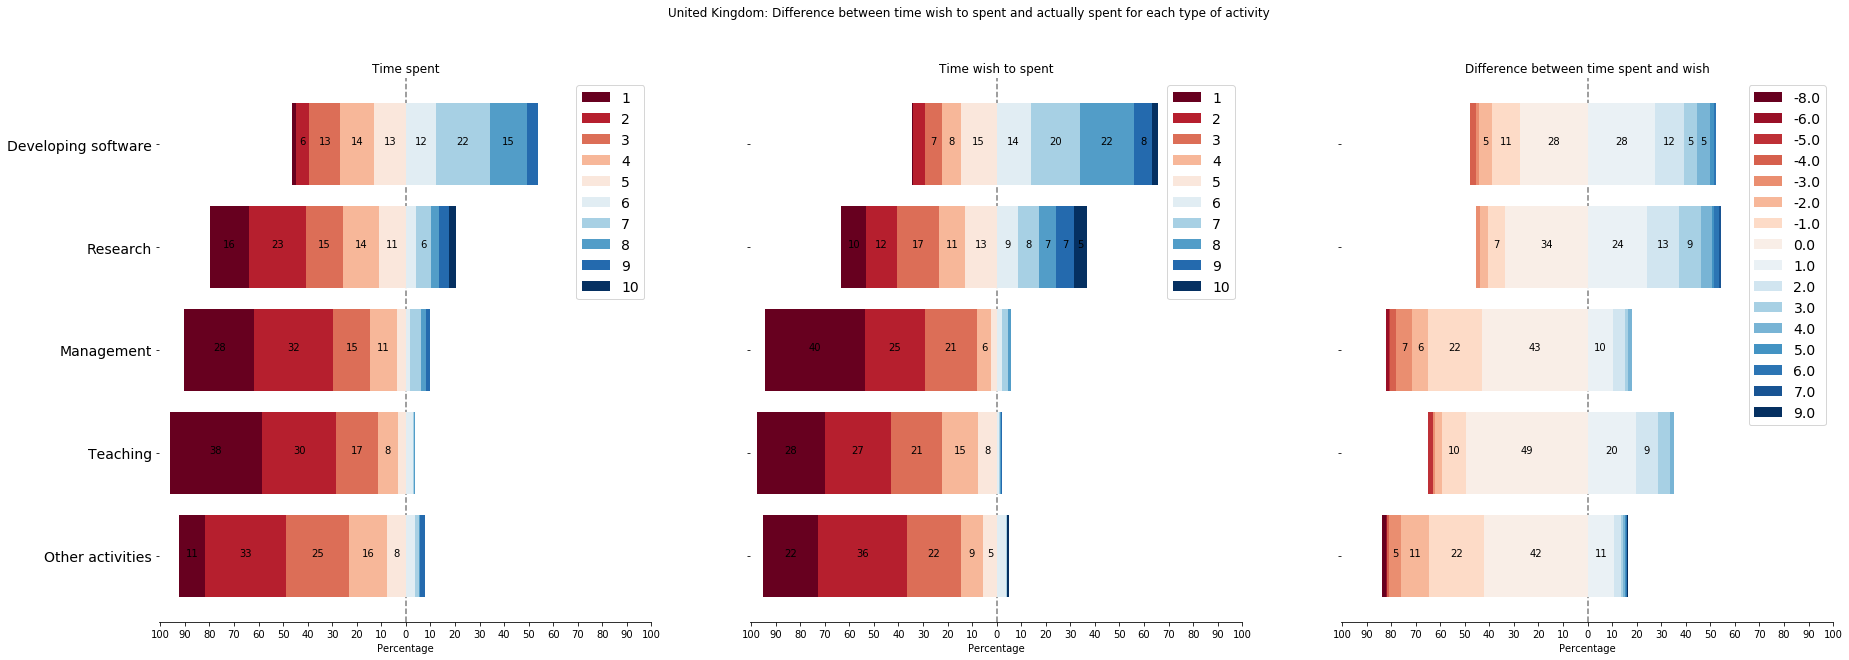

In [14]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## United States

In [15]:
country = 'United States'

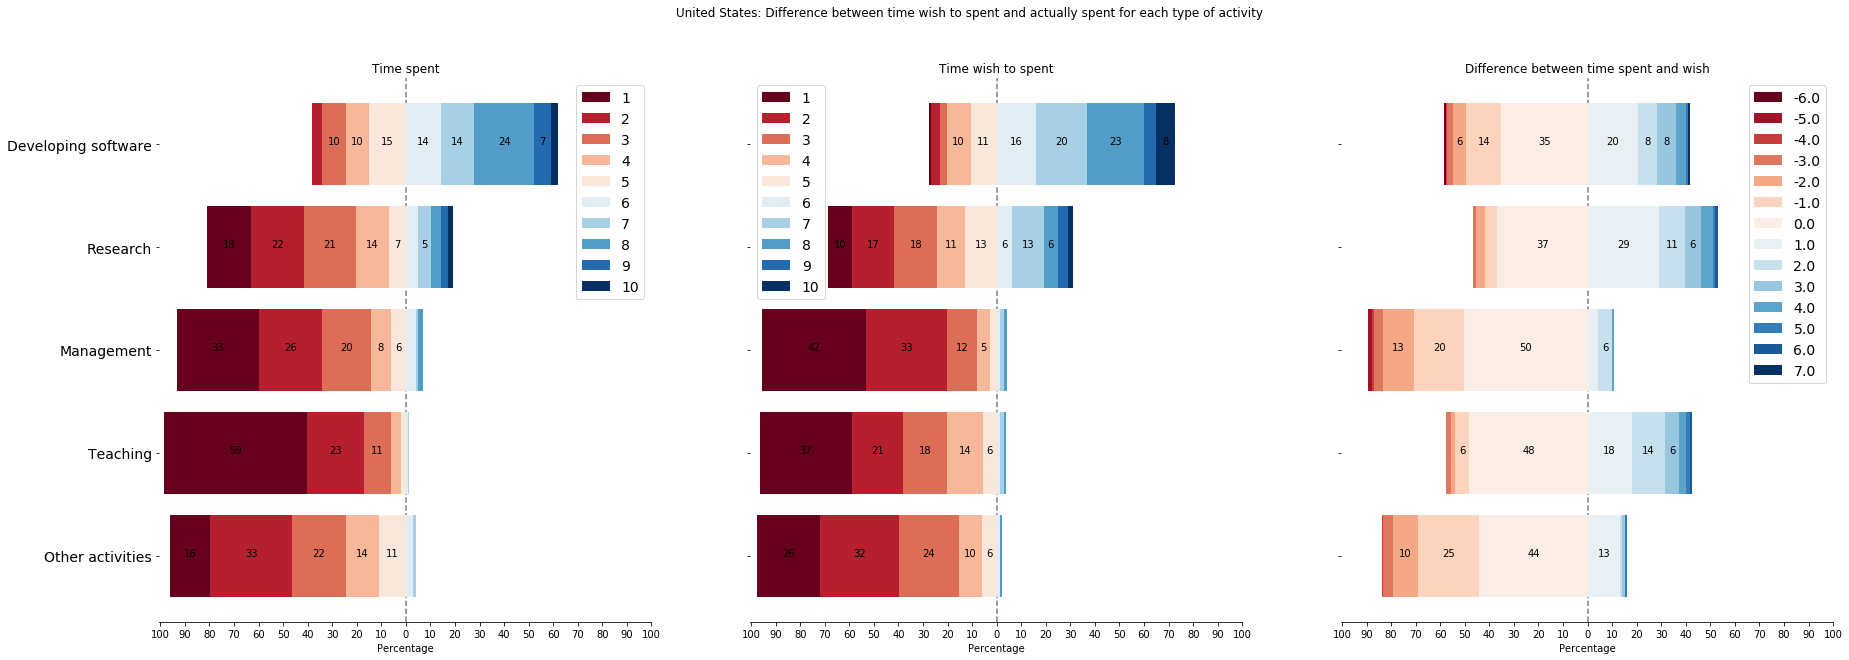

In [16]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)

## Rest of the World

In [17]:
country = 'World'

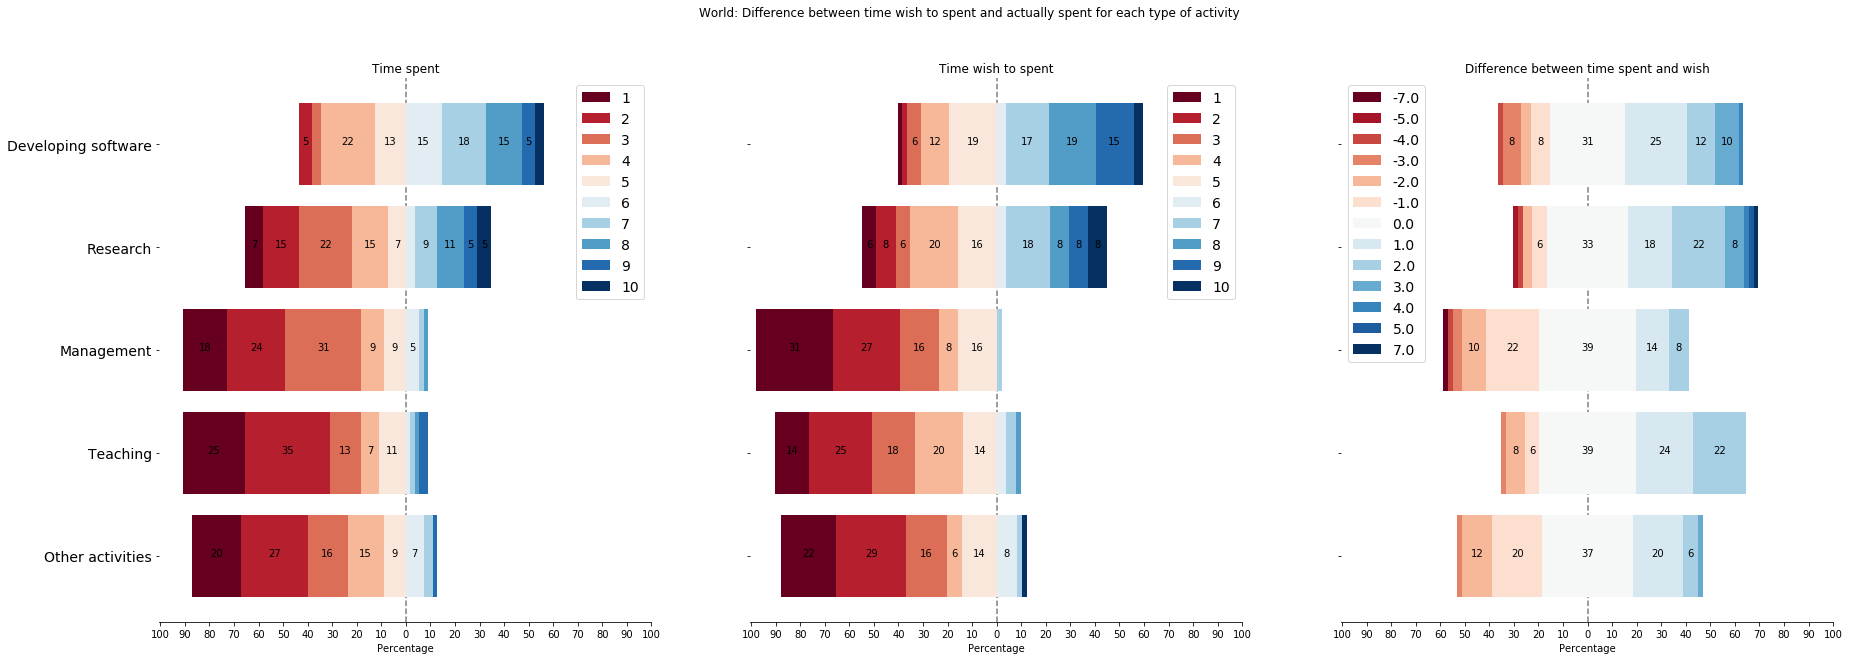

In [18]:
# Plotting the likert scale
plotting_time_likert(country, df_time_spent, df_time_wish, df_time_diff)